### Perceptron

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from pprint import pprint

### Data loading

In [3]:
# read the dataset
df = pd.read_csv('dataset.csv')

# visualize the data
df.head()

,Body_Level,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Smoking,Meal_Count,...,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking,BMI
0,3,1,0.646666,0.690578,1.016135,1,-0.199318,0.236558,0,0.402155,...,0,0,1,0,1,0,0,0,0,0.823278
1,3,1,-0.649582,-0.003364,0.686578,1,0.428856,-1.026715,0,-1.792121,...,0,0,1,0,0,0,0,1,0,0.806112
2,3,0,-0.537725,0.493657,1.790354,1,1.069487,1.401741,0,0.402155,...,0,0,1,0,0,0,0,1,0,1.751663
3,3,0,-1.291128,-0.545353,-0.036499,1,0.986227,-1.620907,0,0.402155,...,0,0,1,0,0,0,0,1,0,0.219426
4,3,0,0.270463,-0.818715,0.951256,1,1.069487,0.974150,0,0.402155,...,0,0,1,0,0,0,0,1,0,1.574457


In [4]:
# data splitting
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Body_Level', axis=1), df['Body_Level'], test_size=0.2, random_state=42)
# Print the shapes of the training and test sets
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (1181, 27)
Test set shape: (296, 27)


### Without bmi feature

In [5]:
# drop the bmi feature
x_no_bmi_train = X_train.drop('BMI', axis=1)
x_no_bmi_train

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Smoking,Meal_Count,Fam_Hist,...,Alcohol_Consump_no,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
660,0,2.894485,-1.375850,-0.176003,1,0.185505,-0.213591,0,-1.714296,1,...,1,0,0,1,0,1,0,0,0,0
933,0,-0.520559,-0.756721,-1.352993,1,-0.780555,-1.620907,0,-2.127945,0,...,1,0,0,1,0,0,0,0,1,0
254,0,1.101919,-0.090067,-0.556348,1,0.358678,-0.376294,0,0.402155,1,...,0,0,0,1,0,1,0,0,0,0
1117,1,2.643528,0.511486,1.114023,1,-0.780555,-1.390872,0,0.024564,1,...,1,0,0,1,0,1,0,0,0,0
812,1,-0.275467,-0.765239,-0.629718,1,-0.780555,1.287202,0,-2.127945,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,1.627336,0.334466,0.651969,1,0.146730,-1.620907,0,-0.800193,1,...,1,0,0,1,0,1,0,0,0,0
1294,0,-0.398926,0.335871,1.864626,1,1.069487,-0.837585,0,0.402155,1,...,0,0,0,1,0,0,0,0,1,0
860,1,0.275591,1.298113,0.707655,1,1.069487,0.170120,0,0.402155,1,...,0,0,0,1,0,0,0,0,1,0
1459,0,0.270463,-0.974747,0.718137,1,1.069487,0.973931,0,0.402155,1,...,0,0,0,1,0,0,0,0,1,0


In [6]:
# train perceptron model
perceptron_model = Perceptron()
trained_perceptron_model = perceptron_model.fit(x_no_bmi_train, Y_train)

In [7]:
y_predicted = trained_perceptron_model.predict(X_test.drop('BMI', axis=1))
Accuarcy = accuracy_score(Y_test, y_predicted)
print("Accuracy score: {}".format(Accuarcy))
print("F1 score: {}".format(f1_score(Y_test, y_predicted, average='weighted')))
print(confusion_matrix(Y_test, y_predicted))

Accuracy score: 0.6790540540540541
F1 score: 0.6197850222740702
[[ 25  16   0   0]
 [  0  40   3   0]
 [  0  43   9  33]
 [  0   0   0 127]]


### Using BMI

In [8]:
# train perceptron model
perceptron_model = Perceptron()
trained_perceptron_model = perceptron_model.fit(X_train, Y_train)

In [9]:
y_predicted = trained_perceptron_model.predict(X_test)
Accuarcy = accuracy_score(Y_test, y_predicted)
print("Accuracy score: {}".format(Accuarcy))
print("F1 score: {}".format(f1_score(Y_test, y_predicted, average='weighted')))
print(confusion_matrix(Y_test, y_predicted))

Accuracy score: 0.7331081081081081
F1 score: 0.7313983008443043
[[ 26  12   3   0]
 [  1  35   7   0]
 [  0  44  31  10]
 [  0   2   0 125]]


### BMI, Height


In [18]:
X_train['BMI']
Y_train.value_counts()

3    553
2    321
1    158
0    149
Name: Body_Level, dtype: int64

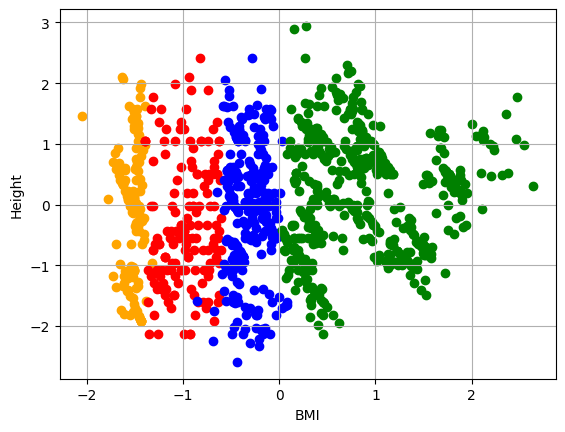

In [25]:
# categories of the points as integers (1-5)
categories = [0, 1, 2, 3]

# define the colors for each category
colors = {
    0: 'orange',
    1: 'red',
    2: 'blue',
    3: 'green'
}

classes = [
    X_train.loc[Y_train == 0],
    X_train.loc[Y_train == 1],
    X_train.loc[Y_train == 2],
    X_train.loc[Y_train == 3]
]

# create a scatter plot with different colors for each category
plt.scatter(classes[0]['BMI'], classes[0]['Height'], color=colors[0])
plt.scatter(classes[1]['BMI'], classes[1]['Height'], color=colors[1])
plt.scatter(classes[2]['BMI'], classes[2]['Height'], color=colors[2])
plt.scatter(classes[3]['BMI'], classes[3]['Height'], color=colors[3])


# add gridlines and labels to the plot
plt.grid(True)
plt.xlabel('BMI')
plt.ylabel('Height')

# show the plot
plt.show()

In [20]:
# train perceptron model
perceptron_model = Perceptron()
trained_perceptron_model = perceptron_model.fit(X_train[['BMI', 'Height']], Y_train)

In [21]:
y_predicted = trained_perceptron_model.predict(X_test[['BMI', 'Height']])
Accuarcy = accuracy_score(Y_test, y_predicted)
print("Accuracy score: {}".format(Accuarcy))
print("F1 score: {}".format(f1_score(Y_test, y_predicted, average='weighted')))
print(confusion_matrix(Y_test, y_predicted))

Accuracy score: 0.7837837837837838
F1 score: 0.7665928180911984
[[ 33   0   8   0]
 [  2   6  35   0]
 [  0  12  72   1]
 [  0   0   6 121]]


### Bmi and weight

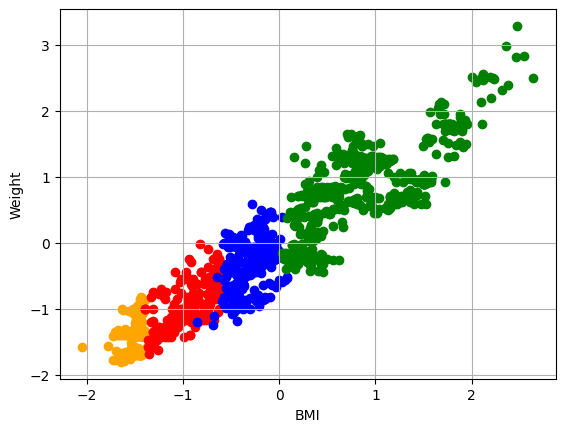

In [22]:
# categories of the points as integers (1-5)
categories = [0, 1, 2, 3]

# define the colors for each category
colors = {
    0: 'orange',
    1: 'red',
    2: 'blue',
    3: 'green'
}

classes = [
    X_train.loc[Y_train == 0],
    X_train.loc[Y_train == 1],
    X_train.loc[Y_train == 2],
    X_train.loc[Y_train == 3]
]

# create a scatter plot with different colors for each category
plt.scatter(classes[0]['BMI'], classes[0]['Weight'], color=colors[0])
plt.scatter(classes[1]['BMI'], classes[1]['Weight'], color=colors[1])
plt.scatter(classes[2]['BMI'], classes[2]['Weight'], color=colors[2])
plt.scatter(classes[3]['BMI'], classes[3]['Weight'], color=colors[3])


# add gridlines and labels to the plot
plt.grid(True)
plt.xlabel('BMI')
plt.ylabel('Weight')

# show the plot
plt.show()

In [23]:
# train perceptron model
perceptron_model = Perceptron()
trained_perceptron_model = perceptron_model.fit(X_train[['BMI', 'Weight']], Y_train)

In [24]:
y_predicted = trained_perceptron_model.predict(X_test[['BMI', 'Weight']])
Accuarcy = accuracy_score(Y_test, y_predicted)
print("Accuracy score: {}".format(Accuarcy))
print("F1 score: {}".format(f1_score(Y_test, y_predicted, average='weighted')))
print(confusion_matrix(Y_test, y_predicted))

Accuracy score: 0.8851351351351351
F1 score: 0.8868549514622704
[[ 40   1   0   0]
 [  1  41   1   0]
 [  0  29  54   2]
 [  0   0   0 127]]
